In [2]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as pl
from matplotlib.offsetbox import AnchoredText


In [3]:
#load the data
ds = xr.open_dataset("wspd.mon.mean.nc", engine="netcdf4")
wspd=ds.wspd.sel(level=1000).isel(time=-1)
wspd

<xarray.DataArray 'wspd' (lat: 73, lon: 144)>
array([[7.081442, 7.085784, 7.081607, ..., 7.083218, 7.084593, 7.079065],
       [7.53018 , 7.571534, 7.618618, ..., 7.378658, 7.43239 , 7.484792],
       [6.237091, 6.415551, 6.576534, ..., 5.680278, 5.871273, 6.056434],
       ...,
       [4.959436, 4.976665, 4.988719, ..., 4.838407, 4.882954, 4.923117],
       [4.968863, 4.967001, 4.968515, ..., 4.951062, 4.962197, 4.970148],
       [4.457119, 4.454576, 4.450559, ..., 4.452214, 4.453504, 4.454989]],
      dtype=float32)
Coordinates:
    level    float32 1e+03
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2018-01-01
Attributes:
    long_name:     Monthly mean wind speed from daily wind speed (from daily ...
    units:         m/s
    precision:     2
    var_desc:      Wind Speed
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [  0. 200.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [  0.5399933 126.53999  ]

2.1

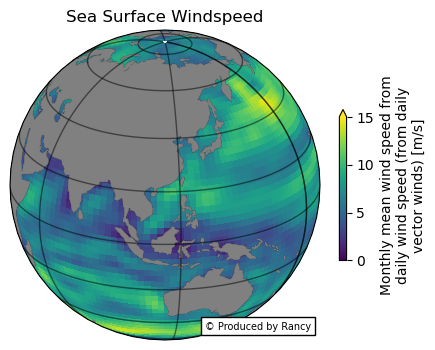

In [4]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with Orthographic projection style
central_lon, central_lat = 114.06, 22.54
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Plot the windspeed
wspd.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=15, cbar_kwargs={'shrink': 0.4})

ax.set_title('Sea Surface Windspeed')

#Mask land data by adding land feature and changing its zorder
ax.add_feature(cfeature.LAND, edgecolor='grey', facecolor='grey',
                linewidths=0.5, zorder=1)


# Add a text annotation
SOURCE = 'Produced by Rancy'
text = AnchoredText('\u00A9 {}'
                        ''.format(SOURCE),
                        loc=4, prop={'size': 7}, frameon=True)
ax.add_artist(text)
 


2.2

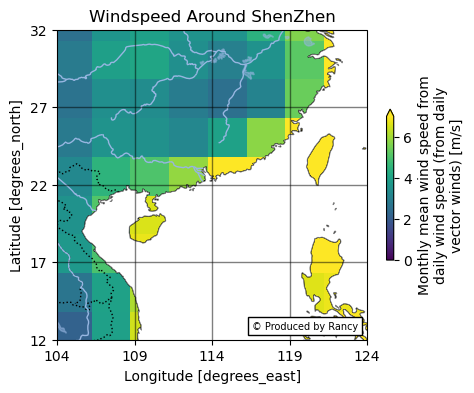

In [5]:
#draw a map around ShenZhen
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([104, 124, 12, 32], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(12,32,5))
gl.xlocator = mticker.FixedLocator(np.arange(104,124,5))

ax.set_xticks([104,109,114,119,124], crs=ccrs.PlateCarree())
ax.set_yticks([12,17,22,27,32], crs=ccrs.PlateCarree())


# Plot the windspeed
wspd.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=7, cbar_kwargs={'shrink': 0.4})

#set title
ax.set_title('Windspeed Around ShenZhen')

# Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.OCEAN, edgecolor='grey', facecolor='white',
                linewidths=0.5, zorder=1)

# Add a text annotation
SOURCE = 'Produced by Rancy'
text = AnchoredText('\u00A9 {}'
                        ''.format(SOURCE),
                        loc=4, prop={'size': 7}, frameon=True)
ax.add_artist(text)